# THYROID CLASSIFICATION

## Importing the Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle

## Reading the Dataset

In [140]:
data = pd.read_csv('thyroid_data.csv')

## Analysing the Data

In [141]:
data.head()

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41.0,F,f,f,f,f,f,f,f,...,1.30,t,2.5,t,125.0,t,1.14,t,109.0,negative
1,1,23.0,F,f,f,f,f,f,f,f,...,4.10,t,2.0,t,102.0,f,NaN,f,NaN,negative
2,2,46.0,M,f,f,f,f,f,f,f,...,0.98,f,NaN,t,109.0,t,0.91,t,120.0,negative
3,3,70.0,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175.0,f,NaN,f,NaN,negative
4,4,70.0,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61.0,t,0.87,t,70.0,negative


In [142]:
data.tail()

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
3215,2774,82.0,M,f,f,f,f,f,f,f,...,2.200,t,1.0,t,68.0,t,0.77,t,88.0,sick
3216,2776,79.0,M,f,f,f,f,f,f,f,...,1.100,t,0.7,t,116.0,t,0.85,t,137.0,sick
3217,2782,50.0,F,f,f,f,f,f,f,f,...,4.800,t,0.6,t,98.0,t,0.80,t,122.0,sick
3218,2786,73.0,NaN,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173.0,t,1.00,t,173.0,sick
3219,2796,73.0,M,f,t,f,f,f,f,f,...,NaN,t,0.7,t,63.0,t,0.88,t,72.0,sick


In [143]:
data.shape

(3220, 28)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S.no                       3220 non-null   int64  
 1   Age                        3219 non-null   float64
 2   Sex                        3093 non-null   object 
 3   On Thyroxine               3220 non-null   object 
 4   Query on Thyroxine         3220 non-null   object 
 5   On Antithyroid Medication  3220 non-null   object 
 6   Sick                       3220 non-null   object 
 7   Pregnant                   3220 non-null   object 
 8   Thyroid Surgery            3220 non-null   object 
 9   I131 Treatment             3220 non-null   object 
 10  Query Hypothyroid          3220 non-null   object 
 11  Query Hyperthyroid         3220 non-null   object 
 12  Lithium                    3220 non-null   object 
 13  Goitre                     3220 non-null   objec

In [145]:
# Columns
data=data.drop(['S.no'],axis=1)
data.columns

Index(['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

## Visualizing the Data

### i. Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

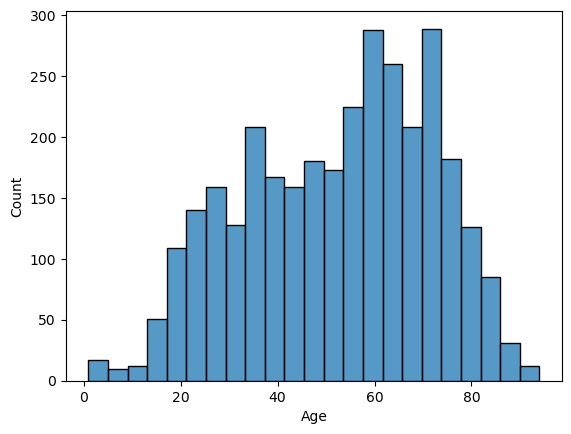

In [146]:
# Histogram
sns.histplot(data['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

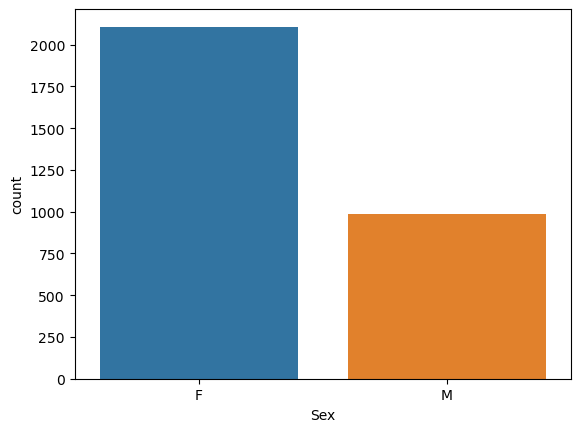

In [147]:
# Bar Chart
sns.countplot(data['Sex'])

negative        2752
hypothyroid      220
sick             171
hyperthyroid      77
Name: Category, dtype: int64


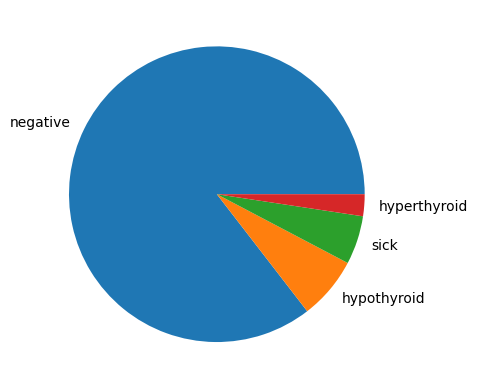

In [148]:
# Pie Chart
x = data['Category'].value_counts()
print(x)
plt.pie(x.values,labels=x.index)
plt.show()

### ii. Bivariate Analysis

#### Categorical Vs Numerical

<AxesSubplot:xlabel='Category', ylabel='Age'>

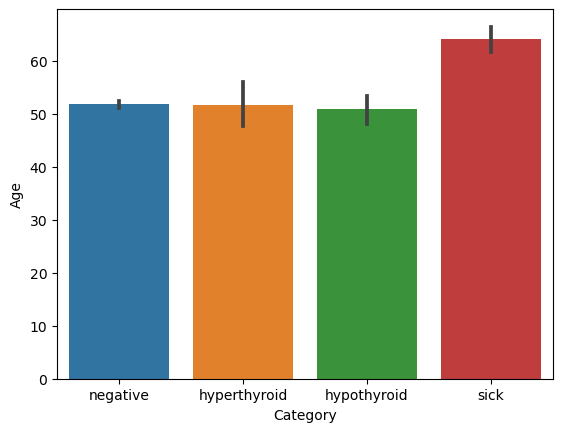

In [149]:
# Bar Plot
sns.barplot(x=data['Category'], y=data['Age'])

#### Numerical Vs Numerical

<AxesSubplot:xlabel='Age', ylabel='TSH'>

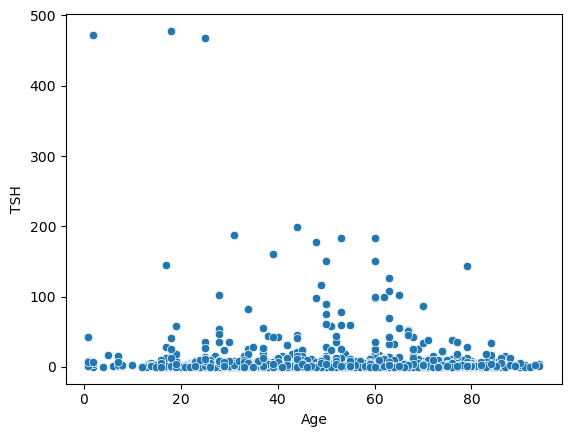

In [150]:
# Scatter Plot
sns.scatterplot(x=data['Age'],y=data['TSH'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


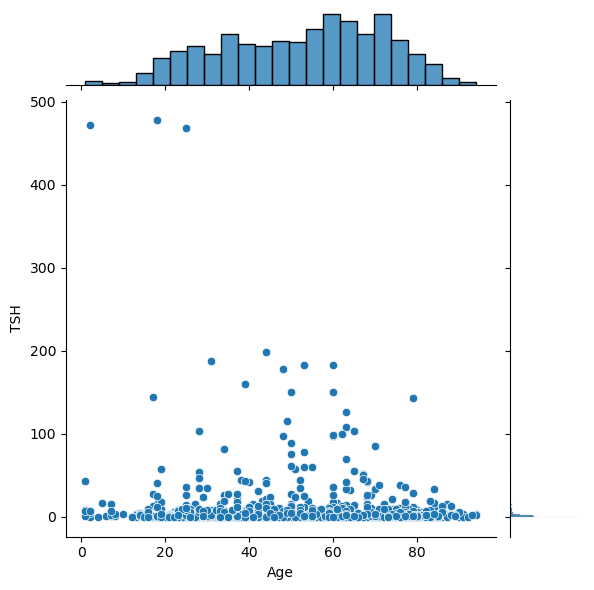

In [151]:
# Join Plot
sns.jointplot(data.Age,data.TSH)

#### Categorical Vs Categorical

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

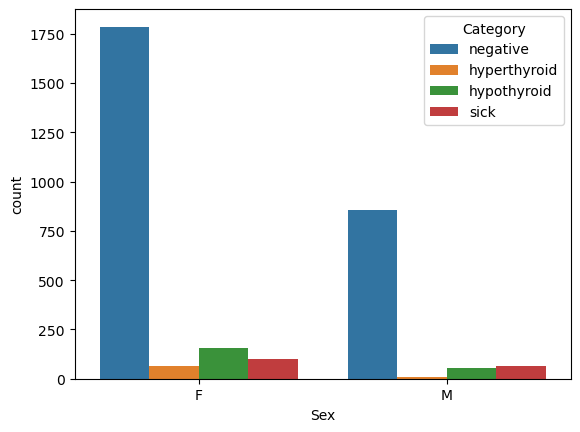

In [152]:
# Count PLot
sns.countplot(data['Sex'],hue=data['Category'])

### iii. Multivariate Analysis

<AxesSubplot:>

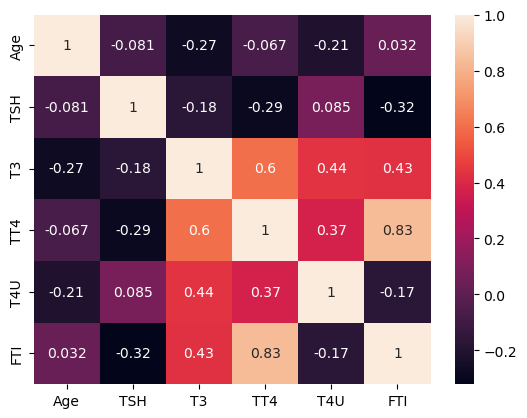

In [153]:
# Heat Map
sns.heatmap(data.corr(), annot=True)

## Data Preprocessing

### i. Checking for Null Values

In [154]:
data.isna()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3218,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
data.isnull().any()

Age                           True
Sex                           True
On Thyroxine                 False
Query on Thyroxine           False
On Antithyroid Medication    False
Sick                         False
Pregnant                     False
Thyroid Surgery              False
I131 Treatment               False
Query Hypothyroid            False
Query Hyperthyroid           False
Lithium                      False
Goitre                       False
Tumor                        False
Hypopituitary                False
Psych                        False
TSH Measured                 False
TSH                           True
T3 Measured                  False
T3                            True
TT4 Measured                 False
TT4                           True
T4U Measured                 False
T4U                           True
FTI Measured                 False
FTI                           True
Category                     False
dtype: bool

In [156]:
data.isnull().sum()

Age                            1
Sex                          127
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH Measured                   0
TSH                          247
T3 Measured                    0
T3                           589
TT4 Measured                   0
TT4                          142
T4U Measured                   0
T4U                          276
FTI Measured                   0
FTI                          274
Category                       0
dtype: int64

In [157]:
# Replacing Missing Values of Numerical attributes with their Median
data['Age'].fillna((data['Age'].mean()), inplace = True)
data['TSH'].fillna((data['TSH'].mean()), inplace = True)
data['T3'].fillna((data['T3'].mean()), inplace = True)
data['TT4'].fillna((data['TT4'].mean()), inplace = True)
data['T4U'].fillna((data['T4U'].mean()), inplace = True)
data['FTI'].fillna((data['FTI'].mean()), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

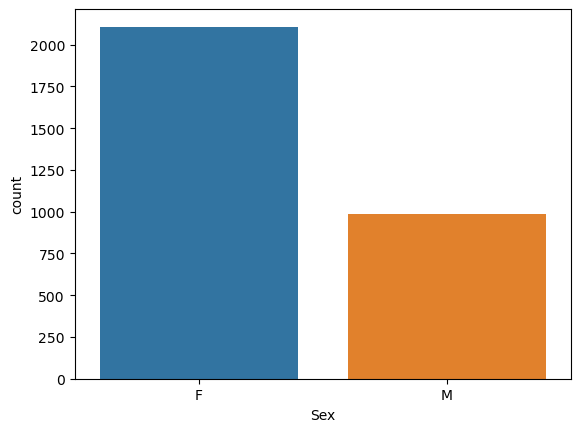

In [158]:
# Frequently occuring category of Categorical attribute - Sex
sns.countplot(data['Sex'])

In [159]:
# Replacing Missing Values of Categorical attribute - Sex with frequently occuring category - F
data['Sex'].fillna('F',inplace=True)

In [160]:
data.isnull().sum()

Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

### ii. Checking for Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

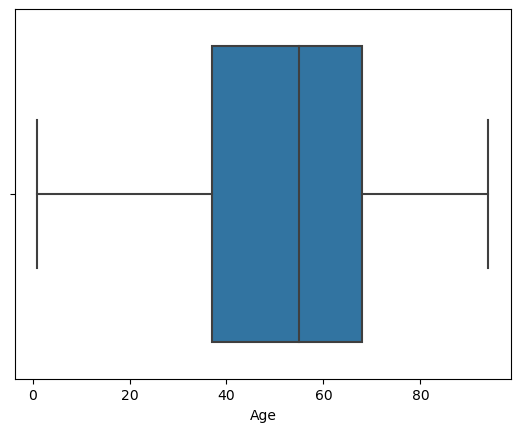

In [161]:
# Age (Numerical attribute)
sns.boxplot(data.Age)

### iii. Descriptive Analysis

In [162]:
data.describe()

,Age,TSH,T3,TT4,T4U,FTI
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,52.407580,6.724731,1.963341,107.804353,0.989889,110.659810
std,19.106617,26.510615,0.839672,38.078339,0.185911,35.949223
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.577500,1.600000,86.000000,0.880000,93.000000
50%,55.000000,1.700000,1.963341,104.000000,0.989889,109.000000
75%,68.000000,5.200000,2.200000,123.000000,1.070000,123.000000
max,94.000000,478.000000,10.600000,430.000000,2.120000,395.000000


In [163]:
data.mean()

C:\Users\JEYASRI VARTHINI\AppData\Local\Temp\ipykernel_8004\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Age     52.407580
TSH      6.724731
T3       1.963341
TT4    107.804353
T4U      0.989889
FTI    110.659810
dtype: float64

In [164]:
data.median()

C:\Users\JEYASRI VARTHINI\AppData\Local\Temp\ipykernel_8004\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Age     55.000000
TSH      1.700000
T3       1.963341
TT4    104.000000
T4U      0.989889
FTI    109.000000
dtype: float64

In [165]:
data.mode()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,59.0,F,f,f,f,f,f,f,f,f,...,6.724731,t,1.963341,t,107.804353,t,0.989889,t,110.65981,negative


In [166]:
data.var()

C:\Users\JEYASRI VARTHINI\AppData\Local\Temp\ipykernel_8004\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Age     365.062832
TSH     702.812692
T3        0.705049
TT4    1449.959932
T4U       0.034563
FTI    1292.346605
dtype: float64

In [167]:
data.std()

C:\Users\JEYASRI VARTHINI\AppData\Local\Temp\ipykernel_8004\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


Age    19.106617
TSH    26.510615
T3      0.839672
TT4    38.078339
T4U     0.185911
FTI    35.949223
dtype: float64

### iv. Checking the Datatypes

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3220 non-null   float64
 1   Sex                        3220 non-null   object 
 2   On Thyroxine               3220 non-null   object 
 3   Query on Thyroxine         3220 non-null   object 
 4   On Antithyroid Medication  3220 non-null   object 
 5   Sick                       3220 non-null   object 
 6   Pregnant                   3220 non-null   object 
 7   Thyroid Surgery            3220 non-null   object 
 8   I131 Treatment             3220 non-null   object 
 9   Query Hypothyroid          3220 non-null   object 
 10  Query Hyperthyroid         3220 non-null   object 
 11  Lithium                    3220 non-null   object 
 12  Goitre                     3220 non-null   object 
 13  Tumor                      3220 non-null   objec

In [169]:
data.dtypes

Age                          float64
Sex                           object
On Thyroxine                  object
Query on Thyroxine            object
On Antithyroid Medication     object
Sick                          object
Pregnant                      object
Thyroid Surgery               object
I131 Treatment                object
Query Hypothyroid             object
Query Hyperthyroid            object
Lithium                       object
Goitre                        object
Tumor                         object
Hypopituitary                 object
Psych                         object
TSH Measured                  object
TSH                          float64
T3 Measured                   object
T3                           float64
TT4 Measured                  object
TT4                          float64
T4U Measured                  object
T4U                          float64
FTI Measured                  object
FTI                          float64
Category                      object
d

### v. Checking Correlation

<AxesSubplot:>

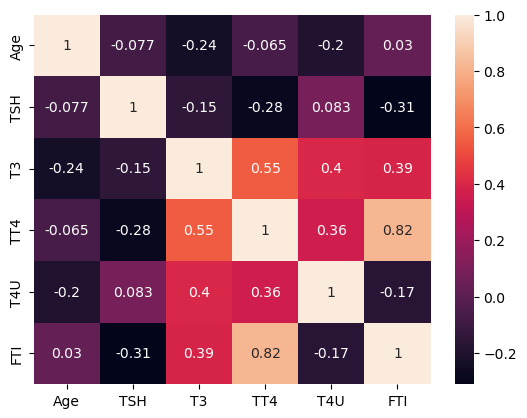

In [170]:
# Heat Map
sns.heatmap(data.corr(), annot=True)

### vi. Handling Categorical Values

#### One Hot Encoding

In [171]:
data = pd.get_dummies(data,columns=['Sex'])
data = pd.get_dummies(data,columns=['On Thyroxine'])
data = pd.get_dummies(data,columns=['Query on Thyroxine'])
data = pd.get_dummies(data,columns=['On Antithyroid Medication'])
data = pd.get_dummies(data,columns=['I131 Treatment'])
data = pd.get_dummies(data,columns=['Query Hypothyroid'])
data = pd.get_dummies(data,columns=['Query Hyperthyroid'])
data = pd.get_dummies(data,columns=['Lithium'])
data = pd.get_dummies(data,columns=['TSH Measured'])
data = pd.get_dummies(data,columns=['Hypopituitary'])
data = pd.get_dummies(data,columns=['Psych'])
data = pd.get_dummies(data,columns=['T3 Measured'])
data = pd.get_dummies(data,columns=['TT4 Measured'])
data = pd.get_dummies(data,columns=['T4U Measured'])
data = pd.get_dummies(data,columns=['FTI Measured'])
data = pd.get_dummies(data,columns=['Sick'])
data = pd.get_dummies(data,columns=['Pregnant'])
data = pd.get_dummies(data,columns=['Thyroid Surgery'])
data = pd.get_dummies(data,columns=['Goitre'])
data = pd.get_dummies(data,columns=['Tumor'])

In [172]:
data

,Age,TSH,T3,TT4,T4U,FTI,Category,Sex_F,Sex_M,On Thyroxine_f,...,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,Goitre_f,Goitre_t,Tumor_f,Tumor_t
0,41.0,1.300000,2.500000,125.0,1.140000,109.00000,negative,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,23.0,4.100000,2.000000,102.0,0.989889,110.65981,negative,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,46.0,0.980000,1.963341,109.0,0.910000,120.00000,negative,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3,70.0,0.160000,1.900000,175.0,0.989889,110.65981,negative,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,70.0,0.720000,1.200000,61.0,0.870000,70.00000,negative,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,82.0,2.200000,1.000000,68.0,0.770000,88.00000,sick,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3216,79.0,1.100000,0.700000,116.0,0.850000,137.00000,sick,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3217,50.0,4.800000,0.600000,98.0,0.800000,122.00000,sick,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3218,73.0,0.015000,1.800000,173.0,1.000000,173.00000,sick,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [173]:
data = data.drop(['Sex_F','On Thyroxine_f', 'Query on Thyroxine_f',
       'On Antithyroid Medication_f','I131 Treatment_f','Query Hypothyroid_f', 
       'Query Hyperthyroid_f','Lithium_f','TSH Measured_f',
       'Hypopituitary_f','Psych_f','T3 Measured_f',  
       'TT4 Measured_f', 'T4U Measured_f','FTI Measured_f',
       'Sick_f','Pregnant_f','Thyroid Surgery_f',
       'Goitre_f','Tumor_f'],axis=1)

In [174]:
data.columns

Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category', 'Sex_M',
       'On Thyroxine_t', 'Query on Thyroxine_t', 'On Antithyroid Medication_t',
       'I131 Treatment_t', 'Query Hypothyroid_t', 'Query Hyperthyroid_t',
       'Lithium_t', 'TSH Measured_t', 'Hypopituitary_t', 'Psych_t',
       'T3 Measured_t', 'TT4 Measured_t', 'T4U Measured_t', 'FTI Measured_t',
       'Sick_t', 'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

### vii. Splitting the Data into X and Y

In [175]:
# Dependent/Target variable y
y = data['Category']
y.head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: Category, dtype: object

In [176]:
# Independent/Predictor variable x
x = data.drop(columns=['Category'],axis=1)
x.head()

,Age,TSH,T3,TT4,T4U,FTI,Sex_M,On Thyroxine_t,Query on Thyroxine_t,On Antithyroid Medication_t,...,Psych_t,T3 Measured_t,TT4 Measured_t,T4U Measured_t,FTI Measured_t,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
0,41.0,1.30,2.500000,125.0,1.140000,109.00000,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1,23.0,4.10,2.000000,102.0,0.989889,110.65981,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,46.0,0.98,1.963341,109.0,0.910000,120.00000,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
3,70.0,0.16,1.900000,175.0,0.989889,110.65981,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,70.0,0.72,1.200000,61.0,0.870000,70.00000,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0


### viii. Splitting Data Into Train And Test

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [178]:
x_train.head()

,Age,TSH,T3,TT4,T4U,FTI,Sex_M,On Thyroxine_t,Query on Thyroxine_t,On Antithyroid Medication_t,...,Psych_t,T3 Measured_t,TT4 Measured_t,T4U Measured_t,FTI Measured_t,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
1292,78.0,2.5,1.1,70.0,0.92,76.0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1651,74.0,5.5,1.4,89.0,0.99,89.0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
406,50.0,28.0,0.2,33.0,0.70,47.0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1713,73.0,4.1,1.0,89.0,0.91,98.0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1462,39.0,0.2,2.2,106.0,0.75,141.0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0


In [179]:
x_test.head()

,Age,TSH,T3,TT4,T4U,FTI,Sex_M,On Thyroxine_t,Query on Thyroxine_t,On Antithyroid Medication_t,...,Psych_t,T3 Measured_t,TT4 Measured_t,T4U Measured_t,FTI Measured_t,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
527,61.0,2.100000,1.200000,109.000000,0.780000,140.00000,1,0,0,0,...,0,1,1,1,1,0,0,0,0,0
883,36.0,7.500000,4.100000,139.000000,1.650000,84.00000,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1692,20.0,0.030000,2.700000,107.000000,1.070000,100.00000,0,0,0,1,...,0,1,1,1,1,0,0,0,0,0
1223,13.0,6.724731,1.963341,107.804353,0.989889,110.65981,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1570,36.0,1.900000,1.963341,123.000000,1.160000,107.00000,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [180]:
y_train

1292        negative
1651        negative
406         negative
1713        negative
1462        negative
            ...     
763         negative
835         negative
1653    hyperthyroid
2607        negative
2732        negative
Name: Category, Length: 2576, dtype: object

In [181]:
y_test

527     negative
883     negative
1692    negative
1223    negative
1570    negative
          ...   
396     negative
76      negative
1051    negative
1503    negative
1217    negative
Name: Category, Length: 644, dtype: object

### ix. Handling Imbalance Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

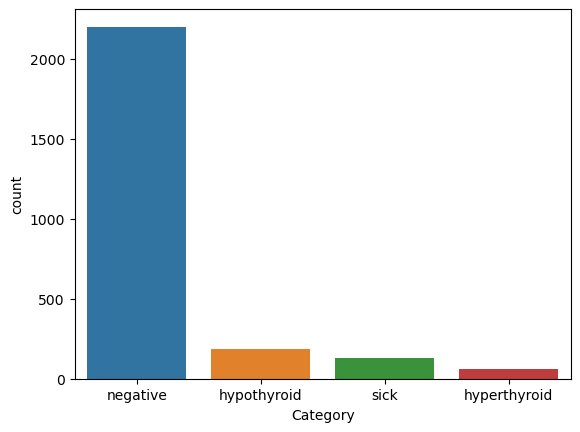

In [182]:
# Visulaizing Imbalance in the Train Data
sns.countplot(y_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

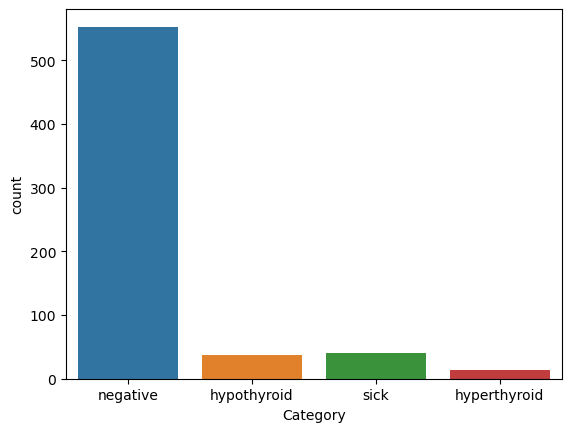

In [183]:
# Visulaizing Imbalance in the Test Data
sns.countplot(y_test)

In [184]:
# Balancing using SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_train, y_train = os.fit_resample(x_train, y_train)
x_test, y_test = os.fit_resample(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

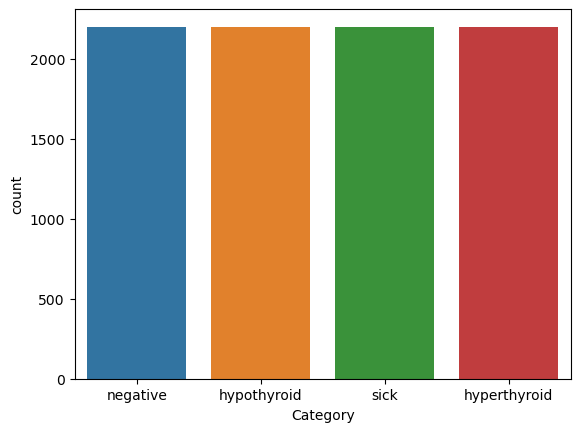

In [185]:
sns.countplot(y_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

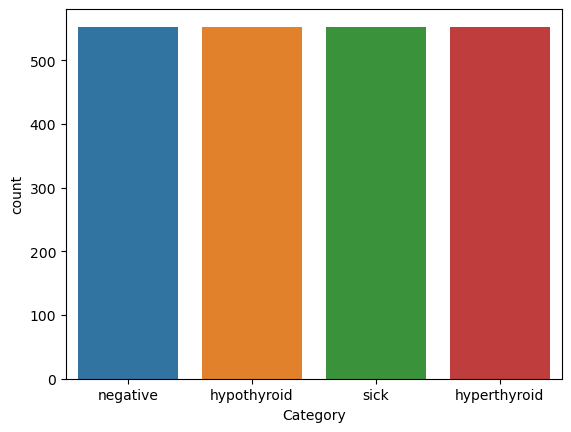

In [186]:
sns.countplot(y_test)

### x. Applying StandardScaler

In [187]:
name = x.columns
name

Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'On Thyroxine_t',
       'Query on Thyroxine_t', 'On Antithyroid Medication_t',
       'I131 Treatment_t', 'Query Hypothyroid_t', 'Query Hyperthyroid_t',
       'Lithium_t', 'TSH Measured_t', 'Hypopituitary_t', 'Psych_t',
       'T3 Measured_t', 'TT4 Measured_t', 'T4U Measured_t', 'FTI Measured_t',
       'Sick_t', 'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [188]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_train_scaled

array([[ 1.26038161, -0.22612786, -0.72828588, ..., -0.06042599,
        -0.04528334, -0.15866577],
       [ 1.04604006, -0.13115448, -0.48731945, ..., -0.06042599,
        -0.04528334, -0.15866577],
       [-0.24000927,  0.58114582, -1.45118516, ..., -0.06042599,
        -0.04528334, -0.15866577],
       ...,
       [ 0.51018617, -0.30261525, -0.80860802, ..., -0.06042599,
        -0.04528334, -0.15866577],
       [ 0.40301539,  0.10627895, -0.74676164, ..., -0.06042599,
        -0.04528334, -0.15866577],
       [ 1.63547933, -0.27154324, -0.76332133, ..., -0.06042599,
        -0.04528334, -0.15866577]])

In [189]:
x_train = pd.DataFrame(x_train_scaled,columns=name)
x_train

,Age,TSH,T3,TT4,T4U,FTI,Sex_M,On Thyroxine_t,Query on Thyroxine_t,On Antithyroid Medication_t,...,Psych_t,T3 Measured_t,TT4 Measured_t,T4U Measured_t,FTI Measured_t,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
0,1.260382,-0.226128,-0.728286,-0.820968,-0.256307,-0.834244,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
1,1.046040,-0.131154,-0.487319,-0.487723,0.135098,-0.606270,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
2,-0.240009,0.581146,-1.451185,-1.469919,-1.486436,-1.342802,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
3,0.992455,-0.175475,-0.808608,-0.487723,-0.312222,-0.448442,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
4,-0.829449,-0.298941,0.155258,-0.189556,-1.206862,0.305627,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,1.064665,-0.160260,-1.104038,0.208200,-0.647712,0.487087,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
8792,-0.384947,-0.050910,-0.992738,-1.370554,-1.219418,-1.269411,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,-2.172353,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
8793,0.510186,-0.302615,-0.808608,-0.273381,-0.796948,-0.011964,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
8794,0.403015,0.106279,-0.746762,-0.528180,-0.871372,-0.295992,2.406715,-0.181326,-0.068433,-0.055489,...,-0.120552,0.460330,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666


In [190]:
scale = StandardScaler()
x_test_scaled = scale.fit_transform(x_test)
x_test_scaled

array([[ 0.22346002, -0.25283978, -0.63013028, ..., -0.06391665,
        -0.06391665, -0.07980869],
       [-1.19027974, -0.10429942,  1.69249708, ..., -0.06391665,
        -0.06391665, -0.07980869],
       [-2.09507318, -0.30978025,  0.5712287 , ..., -0.06391665,
        -0.06391665, -0.07980869],
       ...,
       [ 1.18369952, -0.28979224, -1.18451281, ..., -0.06391665,
        -0.06391665, -0.07980869],
       [ 1.23589838, -0.27504101, -0.99968404, ..., -0.06391665,
        -0.06391665, -0.07980869],
       [ 0.14103739, -0.04779482, -0.81218091, ..., -0.06391665,
        -0.06391665, -0.07980869]])

In [191]:
x_test = pd.DataFrame(x_test_scaled,columns=name)
x_test

,Age,TSH,T3,TT4,T4U,FTI,Sex_M,On Thyroxine_t,Query on Thyroxine_t,On Antithyroid Medication_t,...,Psych_t,T3 Measured_t,TT4 Measured_t,T4U Measured_t,FTI Measured_t,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
0,0.223460,-0.252840,-0.630130,-0.015132,-0.875231,0.322138,2.400943,-0.171219,-0.056344,-0.060248,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
1,-1.190280,-0.104299,1.692497,0.580843,4.093864,-0.639929,-0.416503,-0.171219,-0.056344,-0.060248,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2,-2.095073,-0.309780,0.571229,-0.054864,0.781134,-0.365053,-0.416503,-0.171219,-0.056344,16.598193,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
3,-2.490920,-0.125625,-0.018766,-0.038885,0.323573,-0.181919,-0.416503,-0.171219,-0.056344,-0.060248,...,-0.100228,-2.192208,-8.831761,-4.371395,-4.392446,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
4,-1.190280,-0.258341,-0.018766,0.262989,1.295178,-0.244794,-0.416503,-0.171219,-0.056344,-0.060248,...,-0.100228,-2.192208,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.591070,-0.290781,-0.862382,-0.690571,-1.109338,-0.347896,-0.416503,-0.171219,-0.056344,-0.060248,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2208,1.595387,-0.166355,-1.376372,-1.414307,-0.895254,-1.227950,2.400943,-0.171219,-0.056344,-0.060248,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2209,1.183700,-0.289792,-1.184513,-0.094596,-0.646767,0.133161,-0.416503,-0.171219,-0.056344,-0.060248,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2210,1.235898,-0.275041,-0.999684,0.116264,-0.491945,0.270599,-0.416503,-0.171219,-0.056344,-0.060248,...,-0.100228,0.456161,0.113228,0.228760,0.227664,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809


## Model Building

In [192]:
le1 = LabelEncoder()
y_train = le1.fit_transform(y_train)
print(le1.classes_)

['hyperthyroid' 'hypothyroid' 'negative' 'sick']


In [193]:
le2 = LabelEncoder()
y_test = le2.fit_transform(y_test)
print(le2.classes_)

['hyperthyroid' 'hypothyroid' 'negative' 'sick']


### Random Forest Model

In [194]:
rfr = RandomForestClassifier().fit(x_train,y_train)
y_pred = rfr.predict(x_test)
y_pred

array([2, 2, 2, ..., 3, 3, 3])

In [195]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.7355334538878843

In [196]:
train_score = accuracy_score(y_train,rfr.predict(x_train))
train_score

0.9649840836743975

## Performing Feature Importance

In [197]:
results = permutation_importance(rfr,x_train,y_train,scoring='accuracy')
feature_importance = x_train.columns
importance = results.importances_mean
importance = np.sort(importance)
for i,v in enumerate(importance):
    i= feature_importance[i]
    print('Feature: {:<20} Score: {}'.format(i,v))

Feature: Age                  Score: -2.273760800364233e-05
Feature: TSH                  Score: -2.2737608003620123e-05
Feature: T3                   Score: 0.0
Feature: TT4                  Score: 0.0
Feature: T4U                  Score: 0.0
Feature: FTI                  Score: 0.0
Feature: Sex_M                Score: 4.5475216007306864e-05
Feature: On Thyroxine_t       Score: 4.5475216007306864e-05
Feature: Query on Thyroxine_t Score: 9.095043201456932e-05
Feature: On Antithyroid Medication_t Score: 0.00013642564802185397
Feature: I131 Treatment_t     Score: 0.00029558890404732805
Feature: Query Hypothyroid_t  Score: 0.00038653933606189737
Feature: Query Hyperthyroid_t Score: 0.0004774897680764223
Feature: Lithium_t            Score: 0.0004774897680764223
Feature: TSH Measured_t       Score: 0.0010686675761710119
Feature: Hypopituitary_t      Score: 0.0012050932241928214
Feature: Psych_t              Score: 0.0020463847203274323
Feature: T3 Measured_t        Score: 0.012505684402000

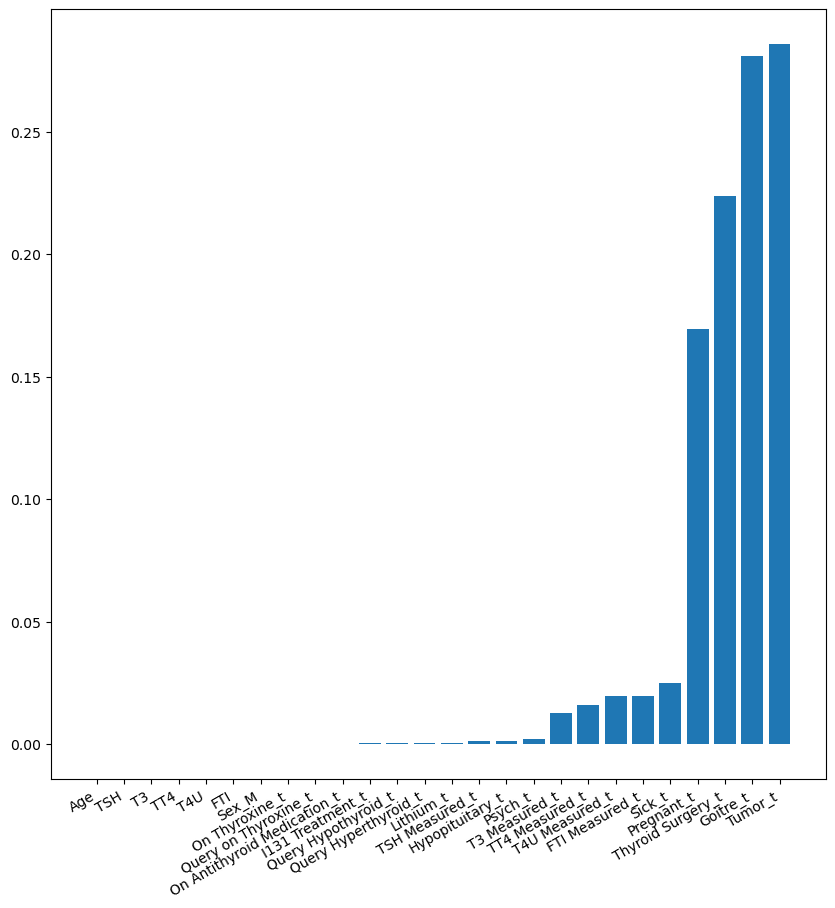

In [198]:
plt.figure(figsize=(10,10))
plt.bar(x=feature_importance,height=importance)
plt.xticks(rotation=30,ha='right')
plt.show()

## Selecting Output Columns

In [199]:
x_train.head()

,Age,TSH,T3,TT4,T4U,FTI,Sex_M,On Thyroxine_t,Query on Thyroxine_t,On Antithyroid Medication_t,...,Psych_t,T3 Measured_t,TT4 Measured_t,T4U Measured_t,FTI Measured_t,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
0,1.260382,-0.226128,-0.728286,-0.820968,-0.256307,-0.834244,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.46033,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
1,1.046040,-0.131154,-0.487319,-0.487723,0.135098,-0.606270,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.46033,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
2,-0.240009,0.581146,-1.451185,-1.469919,-1.486436,-1.342802,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.46033,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
3,0.992455,-0.175475,-0.808608,-0.487723,-0.312222,-0.448442,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.46033,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
4,-0.829449,-0.298941,0.155258,-0.189556,-1.206862,0.305627,-0.415504,-0.181326,-0.068433,-0.055489,...,-0.120552,0.46033,0.161653,0.27633,0.276092,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666


In [200]:
x_train = x_train.drop(['Age','On Thyroxine_t', 'Query on Thyroxine_t',
       'On Antithyroid Medication_t','I131 Treatment_t','Query Hypothyroid_t', 
       'Query Hyperthyroid_t','Lithium_t','TSH Measured_t',
       'Hypopituitary_t','Psych_t','T3 Measured_t',  
       'TT4 Measured_t', 'T4U Measured_t','FTI Measured_t'],axis=1)
x_train

,TSH,T3,TT4,T4U,FTI,Sex_M,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
0,-0.226128,-0.728286,-0.820968,-0.256307,-0.834244,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
1,-0.131154,-0.487319,-0.487723,0.135098,-0.606270,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
2,0.581146,-1.451185,-1.469919,-1.486436,-1.342802,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
3,-0.175475,-0.808608,-0.487723,-0.312222,-0.448442,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
4,-0.298941,0.155258,-0.189556,-1.206862,0.305627,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
...,...,...,...,...,...,...,...,...,...,...,...
8791,-0.160260,-1.104038,0.208200,-0.647712,0.487087,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
8792,-0.050910,-0.992738,-1.370554,-1.219418,-1.269411,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
8793,-0.302615,-0.808608,-0.273381,-0.796948,-0.011964,-0.415504,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666
8794,0.106279,-0.746762,-0.528180,-0.871372,-0.295992,2.406715,-0.13305,-0.064994,-0.060426,-0.045283,-0.158666


In [201]:
x_test = x_test.drop(['Age','On Thyroxine_t', 'Query on Thyroxine_t',
       'On Antithyroid Medication_t','I131 Treatment_t','Query Hypothyroid_t', 
       'Query Hyperthyroid_t','Lithium_t','TSH Measured_t',
       'Hypopituitary_t','Psych_t','T3 Measured_t',  
       'TT4 Measured_t', 'T4U Measured_t','FTI Measured_t'],axis=1)
x_test

,TSH,T3,TT4,T4U,FTI,Sex_M,Sick_t,Pregnant_t,Thyroid Surgery_t,Goitre_t,Tumor_t
0,-0.252840,-0.630130,-0.015132,-0.875231,0.322138,2.400943,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
1,-0.104299,1.692497,0.580843,4.093864,-0.639929,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2,-0.309780,0.571229,-0.054864,0.781134,-0.365053,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
3,-0.125625,-0.018766,-0.038885,0.323573,-0.181919,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
4,-0.258341,-0.018766,0.262989,1.295178,-0.244794,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.290781,-0.862382,-0.690571,-1.109338,-0.347896,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2208,-0.166355,-1.376372,-1.414307,-0.895254,-1.227950,2.400943,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2209,-0.289792,-1.184513,-0.094596,-0.646767,0.133161,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809
2210,-0.275041,-0.999684,0.116264,-0.491945,0.270599,-0.416503,-0.124943,-0.063917,-0.063917,-0.063917,-0.079809


## Model Building On Selected Columns

### i. Random Forest Classifier Model

In [202]:
rfr1 = RandomForestClassifier().fit(x_train,y_train)
rfr1

RandomForestClassifier()

In [203]:
y_pred = rfr1.predict(x_test)
y_pred

array([2, 2, 2, ..., 3, 3, 3])

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.40      0.53       553
           1       0.87      0.75      0.81       553
           2       0.53      0.86      0.66       553
           3       0.72      0.74      0.73       553

    accuracy                           0.69      2212
   macro avg       0.74      0.69      0.68      2212
weighted avg       0.74      0.69      0.68      2212



In [205]:
acc1 = accuracy_score(y_test,y_pred)
acc1

0.6871609403254972

### ii. XGB Classifier Model

In [206]:
xgb1 = XGBClassifier()
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [207]:
y_pred = xgb1.predict(x_test)
y_pred

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.45      0.60       553
           1       0.86      0.81      0.84       553
           2       0.52      0.85      0.64       553
           3       0.82      0.75      0.78       553

    accuracy                           0.71      2212
   macro avg       0.77      0.71      0.71      2212
weighted avg       0.77      0.71      0.71      2212



In [209]:
acc2 = accuracy_score(y_test,y_pred)
acc2

0.7147377938517179

### iii. SVC Model

In [210]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [211]:
y_pred = sv.predict(x_test)
y_pred

array([2, 2, 2, ..., 3, 3, 3])

In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       553
           1       0.88      0.75      0.81       553
           2       0.83      0.78      0.80       553
           3       0.64      0.81      0.71       553

    accuracy                           0.78      2212
   macro avg       0.80      0.78      0.79      2212
weighted avg       0.80      0.78      0.79      2212



In [213]:
acc3 = accuracy_score(y_test,y_pred)
acc3

0.7843580470162749

### iv. Decision Tree Classifier Model

In [214]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc4=accuracy_score(y_test,pred)
acc4

0.6609403254972875

### v. K Nearest Neighbors Classifier Model

In [215]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc5=accuracy_score(y_test,pred)
acc5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7486437613019892

### vi. Naive Bayes Model

In [216]:
model=GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc6=accuracy_score(y_test,pred)
acc6

0.25

## Selecting the Best Model with Highest Accuracy

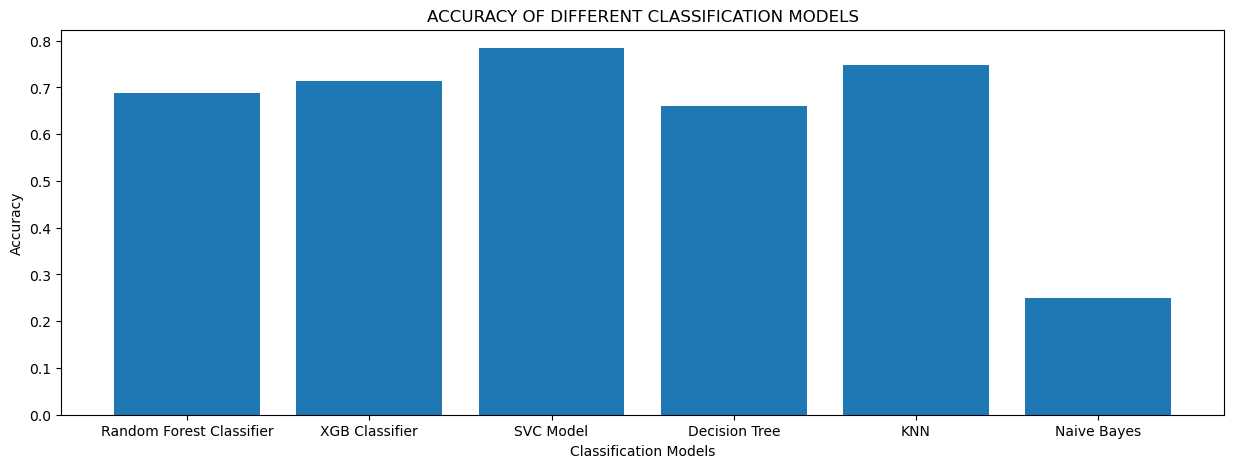

In [217]:
models = ["Random Forest Classifier","XGB Classifier","SVC Model","Decision Tree","KNN","Naive Bayes"]
accuracy_values = [acc1, acc2, acc3, acc4, acc5, acc6]
plt.figure(figsize = (15, 5))
plt.bar(models,accuracy_values)
plt.title('ACCURACY OF DIFFERENT CLASSIFICATION MODELS')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

## Hyperparameter Tuning - Evaluating Performance of the Selected Model using GridSearchCV

### GridSearchCV

In [218]:
params = {
    'kernel':['linear','rbf'],
    'C':[0.1,0.5,1],
    'gamma':[0.01,0.0001]
}

In [219]:
clf = GridSearchCV(sv,params,verbose=2)

In [220]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.8s
[CV] END .................C=0.1, gamma=0.0001, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1], 'gamma': [0.01, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [221]:
clf.best_score_

0.8559588350819165

In [222]:
clf.best_params_

{'C': 0.5, 'gamma': 0.01, 'kernel': 'linear'}

In [223]:
new_sv = SVC(kernel='linear',gamma=0.01,C=0.5)

In [224]:
new_sv.fit(x_train,y_train)

SVC(C=0.5, gamma=0.01, kernel='linear')

In [225]:
y_pred = new_sv.predict(x_test)
y_pred

array([3, 0, 2, ..., 3, 3, 3])

In [226]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       553
           1       0.85      0.81      0.83       553
           2       0.89      0.73      0.80       553
           3       0.71      0.79      0.74       553

    accuracy                           0.81      2212
   macro avg       0.82      0.81      0.81      2212
weighted avg       0.82      0.81      0.81      2212



In [227]:
train_score = accuracy_score(y_train,sv.predict(x_train))
train_score

0.8841518872214643

In [228]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.8141952983725136

### Cross Validation

In [229]:
accuracies = cross_val_score(new_sv,x_train,y_train,cv=10)
print(accuracies.mean())

0.8544796514634398


## Saving the Model

In [230]:
filename = 'thyroid_model.pkl'
pickle.dump(new_sv,open(filename,'wb'))